In [3]:
import torch
import numpy

import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

In [2]:
cuda_available = torch.cuda.is_available()
print(cuda_available)

True


In [6]:
#Device configuration: Use GPU
device = torch.device("cuda")

In [22]:
# Hyper parameters
batch_size = 32
learning_rate = 0.001
epochs = 5
momentum = 0.5
random_seed = 42

# 1. Load and Preprocess the MNIST dataset
transform = transforms.Compose([
    transforms.ToTensor(), # Converts images to Pytorch tensors
    transforms.Normalize((0.1307,), (0.3081,)) # Normalize with mean and std for MNIST
])


train_dataset = datasets.MNIST(root='./data', train=True, transform=transform, download=True)
test_dataset = datasets.MNIST(root='./data', train=False, transform=transform)

train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)


In [23]:
examples = enumerate(test_loader)
batch_idx, (example_data, example_targets) = next(examples)
example_data.shape

torch.Size([32, 1, 28, 28])

- 32 example, 28*28 pixels in grayscale, 1 for no rgb chanel

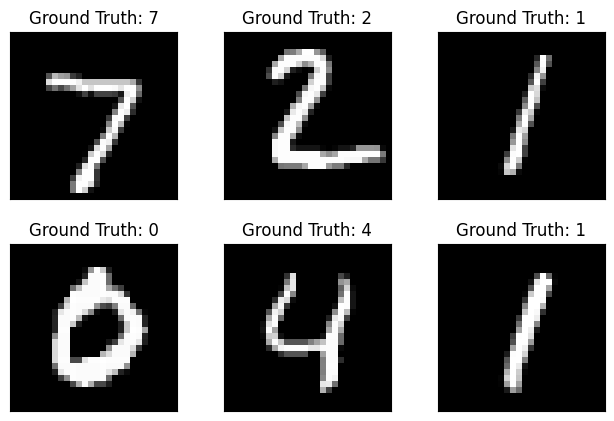

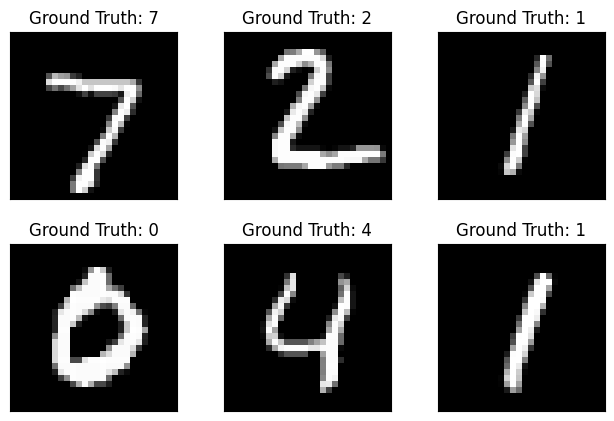

In [24]:
import matplotlib.pyplot as plt

fig = plt.figure()
for i in range(6):
  plt.subplot(2,3,i+1)
  plt.tight_layout()
  plt.imshow(example_data[i][0], cmap='gray', interpolation='none')
  plt.title("Ground Truth: {}".format(example_targets[i]))
  plt.xticks([])
  plt.yticks([])
fig

## 2. Define Neural Network Model


In [25]:
class NeuralNet(nn.Module):
    def __init__(self):
        super(NeuralNet, self).__init__()
        #Flatten layer is built into forward
        self.fc1 = nn.Linear(in_features=28*28, out_features=64)
        self.fc2 = nn.Linear(in_features=64, out_features=10)
        
        #Activation function
        self.activation = nn.ReLU()
        
    def forward(self, x):
        x = x.view(-1, 28*28)
        x = self.fc1(x)
        x = self.activation(x)
        x = self.fc2(x)
        return x

In [26]:
model = NeuralNet().to(device)

In [27]:
# 3. Loss Function and Optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr = learning_rate)

In [28]:
for epoch in range(epochs):
    model.train()
    for batch_idx, (data, targets) in enumerate(train_loader):
        data = data.to(device)
        targets = targets.to(device)
        
        #forward pass
        
        output = model.forward(data)
        loss = criterion(output, targets)
        
        #backward propa
        optimizer.zero_grad() # clear gradients from previous iter
        loss.backward() # back propagation
        optimizer.step() # update param
        if batch_idx % 100 == 0:
            print(f'Epoch [{epoch+1}/{epochs}], Step [{batch_idx}/{len(train_loader)}], Loss: {loss.item():.4f}')

Epoch [1/5], Step [0/1875], Loss: 2.3244
Epoch [1/5], Step [100/1875], Loss: 0.4508
Epoch [1/5], Step [200/1875], Loss: 0.3133
Epoch [1/5], Step [300/1875], Loss: 0.3557
Epoch [1/5], Step [400/1875], Loss: 0.4177
Epoch [1/5], Step [500/1875], Loss: 0.2329
Epoch [1/5], Step [600/1875], Loss: 0.2957
Epoch [1/5], Step [700/1875], Loss: 0.7490
Epoch [1/5], Step [800/1875], Loss: 0.1804
Epoch [1/5], Step [900/1875], Loss: 0.3510
Epoch [1/5], Step [1000/1875], Loss: 0.2315
Epoch [1/5], Step [1100/1875], Loss: 0.1802
Epoch [1/5], Step [1200/1875], Loss: 0.0436
Epoch [1/5], Step [1300/1875], Loss: 0.2411
Epoch [1/5], Step [1400/1875], Loss: 0.2147
Epoch [1/5], Step [1500/1875], Loss: 0.0694
Epoch [1/5], Step [1600/1875], Loss: 0.3214
Epoch [1/5], Step [1700/1875], Loss: 0.1198
Epoch [1/5], Step [1800/1875], Loss: 0.3166
Epoch [2/5], Step [0/1875], Loss: 0.0639
Epoch [2/5], Step [100/1875], Loss: 0.0344
Epoch [2/5], Step [200/1875], Loss: 0.1073
Epoch [2/5], Step [300/1875], Loss: 0.1673
Epoch 

In [29]:
# 5. Evaluate the Model
model.eval()  # Set model to evaluation mode
with torch.no_grad():  # Disable gradient computation for evaluation
    correct = 0
    total = 0
    for data, targets in test_loader:
        data = data.to(device)
        targets = targets.to(device)
        outputs = model(data)
        _, predicted = torch.max(outputs.data, 1)
        total += targets.size(0)
        correct += (predicted == targets).sum().item()

    accuracy = 100 * correct / total
    print(f'Test Accuracy: {accuracy:.2f}%')

Test Accuracy: 97.41%
